In [27]:
from keras.datasets import boston_housing
from keras import models, layers

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [28]:
train_data.shape

(404, 13)

In [29]:
len(train_data)

404

In [30]:
test_data.shape

(102, 13)

In [31]:
test_targets.shape

(102,)

In [32]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [11]:
#Standardize data (z-standardization)
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)

train_data /= std

test_data -= mean
test_data /= std

In [13]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [20]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [37]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i*num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i*num_val_samples:(i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i*num_val_samples],
         train_data[(i+1)*num_val_samples:]],
         axis = 0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1) * num_val_samples:]],
        axis = 0)
    
    model = build_model()
    
    history = model.fit(partial_train_data, partial_train_targets,
              validation_data = (val_data, val_targets),
             epochs = num_epochs, batch_size = 1, verbose = 0)
    mae_hist = history.history['mae']
    all_mae_histories.append(mae_hist)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [44]:
all_mae_histories[0]

[10.642854,
 9.283175,
 7.968668,
 7.4692464,
 6.5725465,
 6.313836,
 6.1528435,
 5.748403,
 5.914507,
 5.460226,
 5.326043,
 5.1765995,
 5.101132,
 4.7904625,
 4.730839,
 4.685769,
 4.75764,
 4.5579576,
 4.5469794,
 4.434862,
 4.341831,
 4.3661118,
 4.341927,
 4.069238,
 4.2650886,
 4.0266123,
 4.2377086,
 3.9323282,
 3.8014338,
 3.8847914,
 3.8990445,
 3.8260493,
 3.6869195,
 3.8975503,
 3.6841497,
 3.680484,
 3.673988,
 3.4096358,
 3.5488157,
 3.5543516,
 3.4112983,
 3.4930894,
 3.426461,
 3.2610128,
 3.357882,
 3.3815765,
 3.3507514,
 3.2793868,
 3.3448727,
 3.2515187,
 3.2862153,
 3.3111808,
 3.31474,
 3.245944,
 3.335133,
 3.175869,
 3.233242,
 3.3734577,
 3.2294548,
 3.2297568,
 3.194845,
 3.2578063,
 3.0878384,
 3.1559994,
 3.0699525,
 3.2549903,
 3.1233191,
 3.1134217,
 3.0370061,
 3.04792,
 3.0987566,
 3.2540479,
 3.180414,
 3.1024256,
 3.0231373,
 3.1583436,
 3.0465698,
 3.0962846,
 3.1610687,
 2.9772584,
 3.033881,
 3.0362213,
 3.0394647,
 3.003071,
 2.9857025,
 2.9702866,


In [47]:
average_mae_hist = [np.mean([x[i] for x in all_mae_histories ]) for i in range(num_epochs)]


In [48]:
average_mae_hist

[9.995467,
 8.577239,
 7.5605507,
 7.0321584,
 6.54687,
 6.412937,
 5.979625,
 5.7598896,
 5.691887,
 5.4716005,
 5.4443307,
 5.17842,
 5.000579,
 4.9691224,
 4.8115253,
 4.804901,
 4.7483807,
 4.6492357,
 4.6302905,
 4.478403,
 4.4814224,
 4.4262547,
 4.2553406,
 4.172779,
 4.2558694,
 4.091476,
 4.1329637,
 3.9978728,
 3.8690903,
 3.893723,
 3.8087096,
 3.7621021,
 3.7232957,
 3.6947994,
 3.6261988,
 3.602787,
 3.6459727,
 3.4906783,
 3.51615,
 3.4979968,
 3.4705884,
 3.406691,
 3.3919964,
 3.3452182,
 3.347233,
 3.3647945,
 3.3069615,
 3.2928736,
 3.2816808,
 3.26888,
 3.2713215,
 3.2400575,
 3.2683225,
 3.1544764,
 3.1764407,
 3.2163918,
 3.2088516,
 3.2644677,
 3.2045894,
 3.1662076,
 3.123438,
 3.1456938,
 3.1013489,
 3.1196272,
 3.063669,
 3.160633,
 3.080227,
 3.0332327,
 3.0478907,
 3.0620937,
 3.0817251,
 3.0453155,
 3.0945606,
 3.0519464,
 2.9507694,
 3.062593,
 3.030084,
 3.0835626,
 3.0107489,
 2.974761,
 2.9452586,
 3.0232687,
 2.9965193,
 2.9605,
 2.962701,
 2.9393055,
 

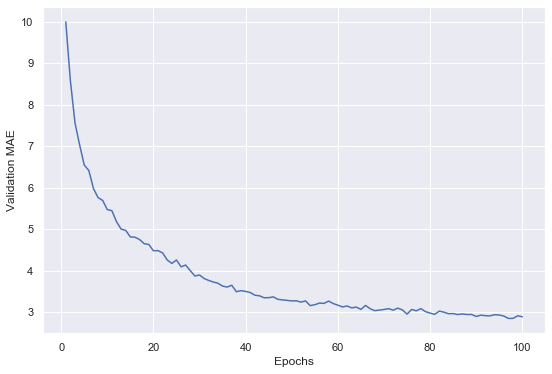

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize' : (9,6)})

plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

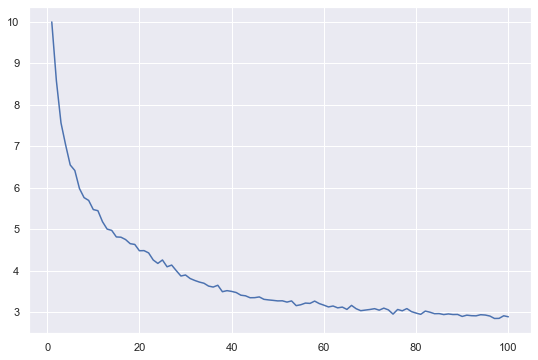

In [51]:
plt.plot(range(1, len(average_mae_hist) + 1), average_mae_hist)

In [54]:
results = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 68us/step


In [64]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    
    for p in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + p * (1 - factor))     
        else:
            smoothed_points.append(p)
    return smoothed_points


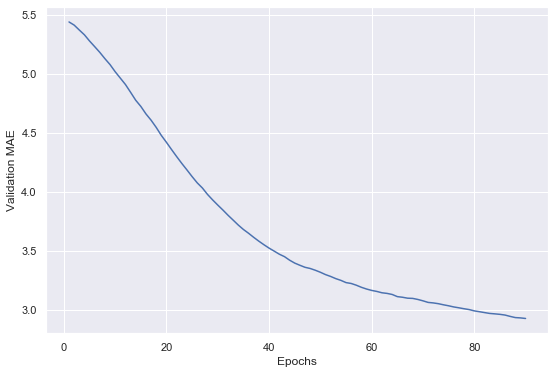

In [65]:
smooth_mae_hist = smooth_curve(average_mae_hist[10:])
plt.plot(range(1, len(smooth_mae_hist) + 1), smooth_mae_hist)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [66]:
best_model = build_model()

best_model.fit(train_data, train_targets, epochs = 80, batch_size = 16, verbose = 0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 68us/step


In [67]:
test_mse_score

23.566429138183594

In [68]:
test_mae_score

3.6053154468536377

In [80]:
res = model.predict(test_data)

In [81]:
res

array([[12.5629835],
       [19.9095   ],
       [22.591097 ],
       [31.475363 ],
       [23.405418 ],
       [23.120943 ],
       [31.717775 ],
       [23.658138 ],
       [21.04246  ],
       [19.695608 ],
       [14.60067  ],
       [18.580929 ],
       [18.186485 ],
       [42.834064 ],
       [18.256733 ],
       [23.245975 ],
       [25.436136 ],
       [21.845207 ],
       [18.620796 ],
       [24.31403  ],
       [10.950366 ],
       [10.577102 ],
       [20.566015 ],
       [18.029163 ],
       [22.681135 ],
       [22.69716  ],
       [26.133112 ],
       [39.653248 ],
       [11.914929 ],
       [24.851713 ],
       [21.629364 ],
       [13.391028 ],
       [38.707745 ],
       [24.052994 ],
       [17.039244 ],
       [ 9.59522  ],
       [16.620695 ],
       [14.406456 ],
       [18.833261 ],
       [29.824684 ],
       [26.98238  ],
       [23.428513 ],
       [16.286926 ],
       [34.58556  ],
       [42.04353  ],
       [24.061136 ],
       [31.454138 ],
       [21.00

In [82]:
res.shape

(102, 1)